Import Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_stata("callreports_final.dta", chunksize=100000, preserve_dtypes=True)

df_raw = pd.DataFrame()

for chunk in data:
    df_raw=df_raw.append(chunk)

Additional Settings

In [3]:
%matplotlib inline
import numpy as np
import seaborn as sns
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Leverage Ratio: L = Assets/Equity (Commercial banks aggregated by bhc)

In [4]:
df = df_raw[["name", "bhcid", "rssdid","assets",'year', "quarter", "equity"]]
df = df[df.quarter==4]
df_indBanks = df[df.bhcid == 0]
df = df[df.bhcid != 0]
df = df.groupby(["bhcid","year"]).agg({"assets":"sum",
                                  "equity":"sum"})

df["leverageRatio"] = df.assets/df.equity
#df
df.index.names = ["rssdid", "year"]
df_indBanks["leverageRatio"] = df_indBanks.assets/df_indBanks.equity
df_indBanks.set_index([df_indBanks.rssdid, df_indBanks.year], inplace=True)
df_indBanks = df_indBanks[["rssdid","bhcid", "year", "assets", "equity", "leverageRatio"]]
df_indBanks.drop(["rssdid", "bhcid", "year"], axis=1, inplace=True)
#df
df_all = pd.concat([df, df_indBanks])

print(df)

print(df_indBanks)

print(df_all)
#fig, ax = plt.subplot()
#ax.plot()

                     assets    equity  leverageRatio
rssdid    year                                      
128146.0  1976.0    11559.0    1049.0      11.019066
          1977.0    14624.0    1177.0      12.424809
          1978.0    15926.0    1255.0      12.690040
          1979.0    17770.0    1341.0      13.251305
          1980.0    18864.0    1413.0      13.350318
...                     ...       ...            ...
4534101.0 2013.0   145922.0   15876.0       9.191358
4552356.0 2013.0    89248.0   10119.0       8.819844
4553960.0 2013.0   412436.0   43104.0       9.568393
4556381.0 2013.0   123832.0   14899.0       8.311430
4558901.0 2013.0  1323371.0  121814.0      10.863866

[180661 rows x 3 columns]
                    assets    equity  leverageRatio
rssdid    year                                     
28.0      1986.0    5742.0    1956.0       2.935583
          1987.0   11844.0    1966.0       6.024415
          1988.0   18221.0    2000.0       9.110500
          1989.0   23312

Clean data of inf values

In [5]:


df_all.leverageRatio.replace([np.inf, -np.inf], np.nan, inplace=True)
df_all.dropna(how="all", subset=["leverageRatio"],inplace=True)
df_all.leverageRatio.describe()
#print(df_all[df_all.leverageRatio > 200])
df_all = df_all[df_all.leverageRatio>0] #removing all negativ leverageRatios
df_all

assets    equity  leverageRatio
rssdid    year                                     
128146.0  1976.0   11559.0    1049.0      11.019066
          1977.0   14624.0    1177.0      12.424809
          1978.0   15926.0    1255.0      12.690040
          1979.0   17770.0    1341.0      13.251305
          1980.0   18864.0    1413.0      13.350318
...                    ...       ...            ...
4262543.0 2011.0  854235.0  172534.0       4.951111
          2012.0  777842.0  173092.0       4.493807
          2013.0  808999.0  168617.0       4.797850
4536084.0 2013.0   35356.0   15989.0       2.211270
4589857.0 2013.0  270022.0  239316.0       1.128307

[325270 rows x 3 columns]

Illustrate data

count    325270.000000
mean         12.195503
std          55.153358
min           1.000000
25%           9.267520
50%          11.296126
75%          13.320675
max       14698.600000
Name: leverageRatio, dtype: float64


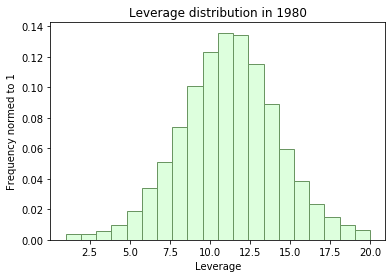

In [6]:
df_all_new = df_all.reset_index(level="year")
print(df_all_new.leverageRatio.describe())
df_all_new[df_all_new.year==1980]
df_test_data = df_all_new[(df_all_new.leverageRatio < 20) & (df_all_new.leverageRatio > 0)]
#fig, ax = plt.subplots()
#plt.xticks(bins, rotation=60)
ax = plt.gca()
ax.set_title("Leverage distribution in 1980")
ax.set_ylabel("Frequency normed to 1")
ax.set_xlabel("Leverage")
n, bins, patches = plt.hist(df_test_data.leverageRatio, bins=20, density=True, edgecolor="#6A9662",color="#DDFFDD")
#df_test_data.hist(column="leverageRatio", grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
#ax1 = plt.gca()

(array([0.00382929, 0.00396829, 0.00584157, 0.00957157, 0.01912658,
        0.03374871, 0.05095899, 0.07422597, 0.10055771, 0.1233481 ,
        0.13579908, 0.13404165, 0.11557038, 0.08904668, 0.05934901,
        0.03844182, 0.02375019, 0.01511526, 0.00991908, 0.00644062]),
 array([ 1.        ,  1.94998288,  2.89996575,  3.84994863,  4.79993151,
         5.74991438,  6.69989726,  7.64988014,  8.59986301,  9.54984589,
        10.49982877, 11.44981164, 12.39979452, 13.3497774 , 14.29976027,
        15.24974315, 16.19972603, 17.1497089 , 18.09969178, 19.04967466,
        19.99965753]),
 <a list of 20 Patch objects>)

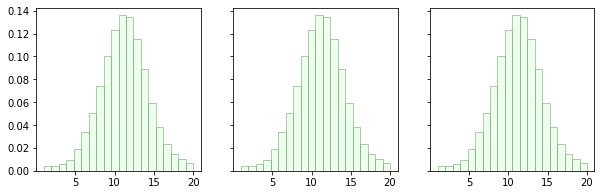

In [7]:

fig, ax = plt.subplots(1,3, sharex='col', sharey='row', figsize=(10, 3))
#plt.xticks(bins, rotation=60)
#ax.set_title("Leverage distribution in 1980")
#ax.set_ylabel("Frequency normed to 1")
#ax.set_ylabel("Leverage")
ax[0].hist(df_test_data.leverageRatio,bins=20 ,density=True, alpha=0.5, edgecolor="#6A9662",color="#DDFFDD")
ax[1].hist(df_test_data.leverageRatio,bins=20 ,density=True, alpha=0.5, edgecolor="#6A9662",color="#DDFFDD")
ax[2].hist(df_test_data.leverageRatio,bins=20 ,density=True, alpha=0.5, edgecolor="#6A9662",color="#DDFFDD")
#n, bins, patches = plt.hist(df_test_data.leverageRatio, bins=20, density=True, edgecolor="#6A9662",color="#DDFFDD")
#df_test_data.hist(column="leverageRatio", grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
#ax1 = plt.gca()

In [8]:
df = df_all.reset_index(level="year")
df

,year,assets,equity,leverageRatio
rssdid,,,,
128146.0,1976.0,11559.0,1049.0,11.019066
128146.0,1977.0,14624.0,1177.0,12.424809
128146.0,1978.0,15926.0,1255.0,12.690040
128146.0,1979.0,17770.0,1341.0,13.251305
128146.0,1980.0,18864.0,1413.0,13.350318
...,...,...,...,...
4262543.0,2011.0,854235.0,172534.0,4.951111
4262543.0,2012.0,777842.0,173092.0,4.493807
4262543.0,2013.0,808999.0,168617.0,4.797850


Histograms for every year for quarter 4. 

<class 'pandas.core.series.Series'>


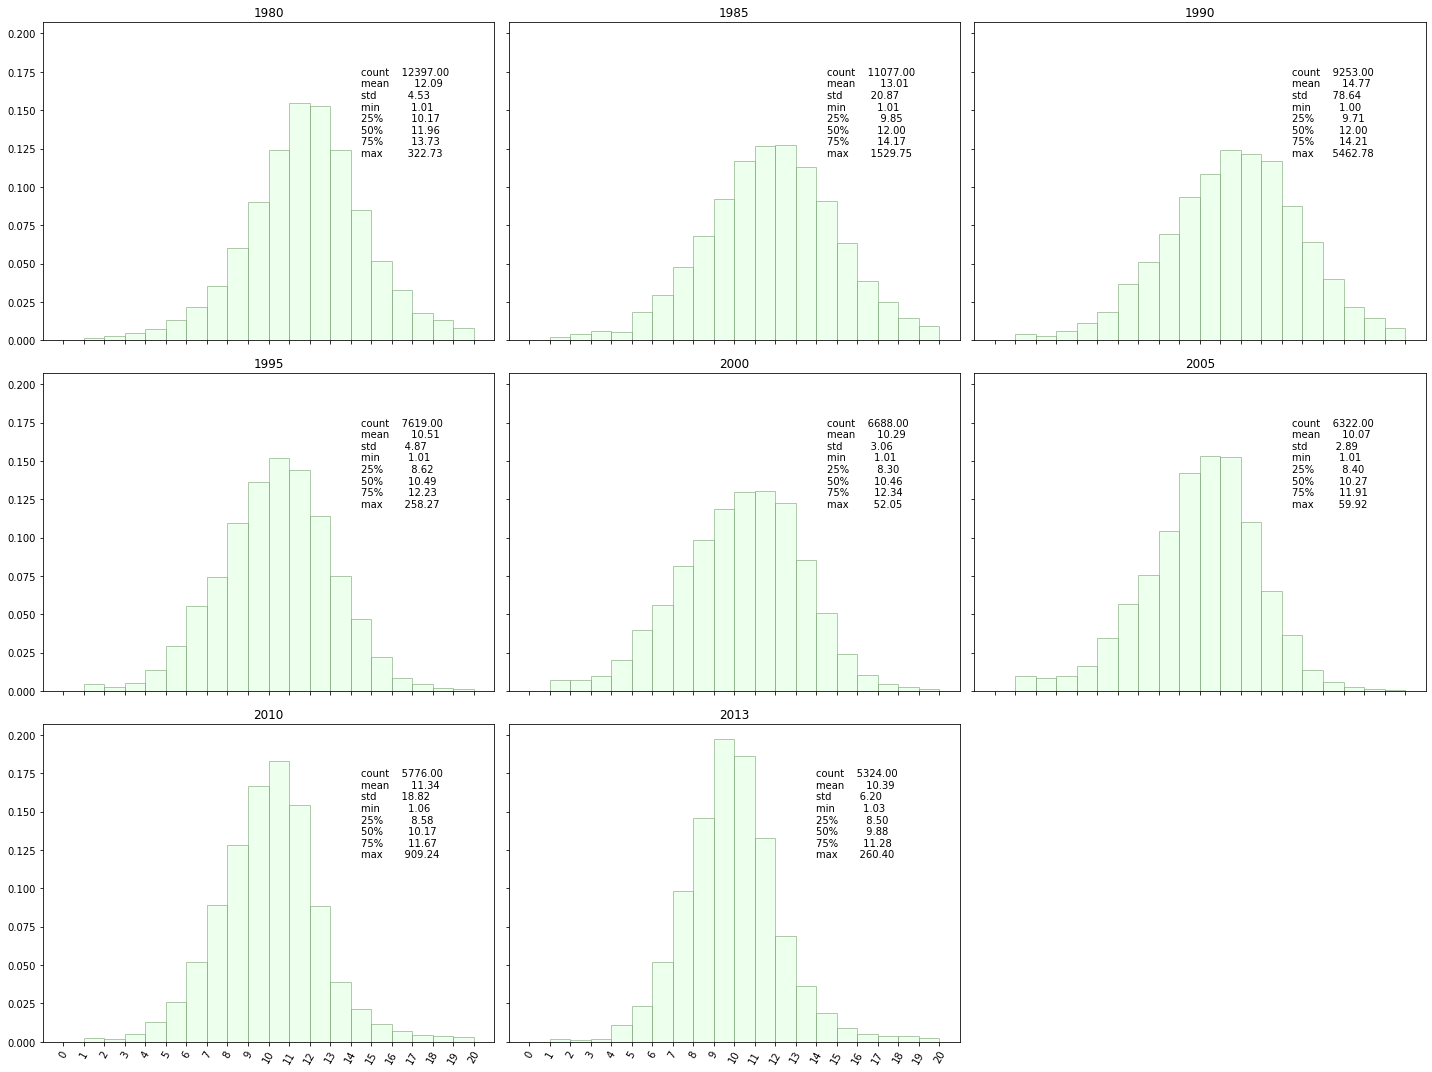

In [9]:

#print(df[df.leverageRatio>20])
#df = df[(df.leverageRatio > 0)]
#print(df)
fig, ax = plt.subplots(3, 3, figsize=(20,15), sharey=True, sharex=True)
ax = ax.ravel() 
year=1980
x = 0
temp_df = pd.DataFrame()
for x in range(7):
    temp_df = df[df.year==year]
    #print(temp_df)
    n, bins, patches = ax[x].hist(temp_df.leverageRatio, bins=20,range=(0,20) ,density=True, alpha=0.5, edgecolor="#6A9662",color="#DDFFDD")
    ax[x].set_title(year)
    ax[x].set(xticks=bins)
    ax[x].text(14.5,0.12,temp_df.leverageRatio.describe().round(2).to_string())
    #ax[x].text(16.5,0.175, "Mean: " + str(round(temp_df.leverageRatio.mean(),2)))
    #ax[x].text(17,0.165, "Median: " + str(temp_df.leverageRatio.median()))
    for tick in ax[x].get_xticklabels():
        tick.set_rotation(60)
    #print(bins)
    #ax[x].set_xticklabels(bins, rotation=60)
    year = year + 5

year = year - 2
temp_df = df[df.year==year]
n, bins, patches = ax[7].hist(temp_df.leverageRatio, bins=20, range=(0,20) ,density=True, alpha=0.5, edgecolor="#6A9662",color="#DDFFDD")
for tick in ax[7].get_xticklabels():
        tick.set_rotation(60)
ax[7].set_title(year)
#ax[1].text(1,1, temp_df.leverageRatio.mean())
ax[7].set(xticks=bins)
ax[7].text(14,0.12,temp_df.leverageRatio.describe().round(2).to_string())
fig.delaxes(ax[8])
#fig.suptitle('Categorical Plotting')
#plt.subplots_adjust(left=0.1, bottom=0.02, right=0.75)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/Leverage/LeverageDistribution_LeverageRatio_8013.png')
y = temp_df.leverageRatio.describe()
print(type(y))

Histograms of Leverage Ratio from 2003-2011 for quarter 4. 

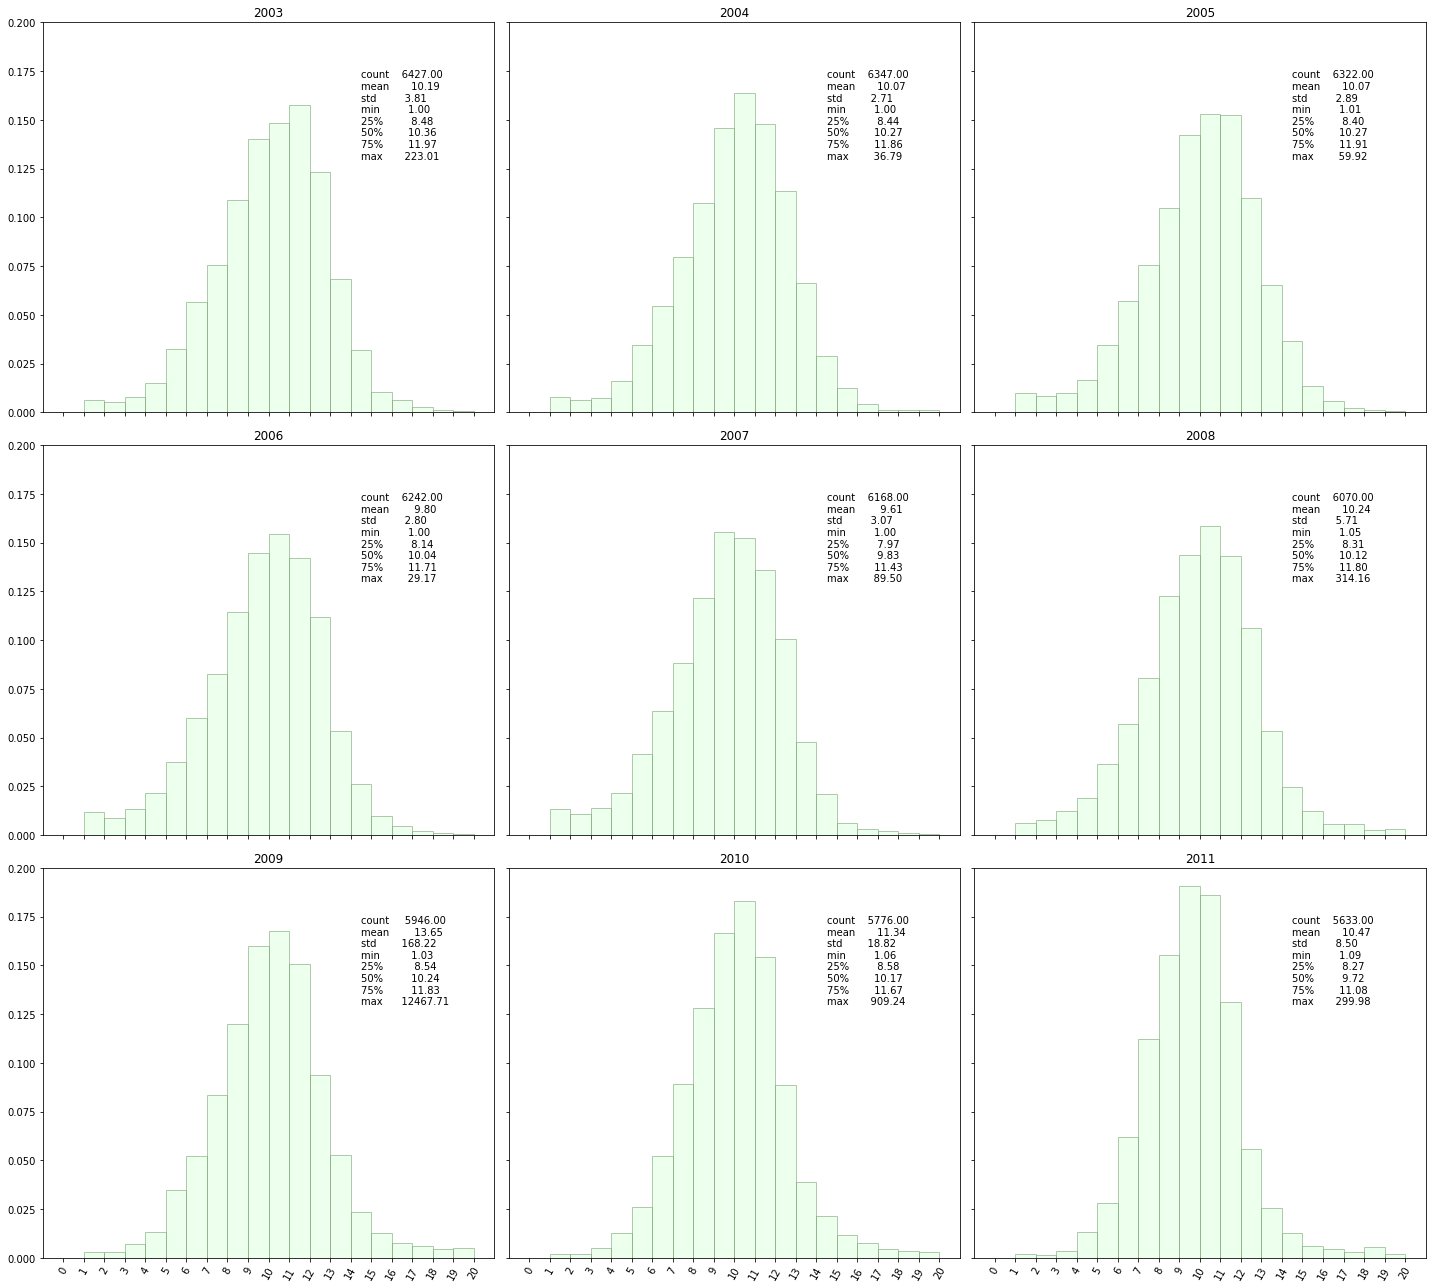

In [10]:
df = df_all.reset_index(level="year")
#df = df[(df.leverageRatio < 20) & (df.leverageRatio > 0)]
#print(df)
fig, ax = plt.subplots(3, 3, figsize=(20,18), sharey=True, sharex=True)
plt.title("Leverage Ratio Distribution (Asset/Equity)")
ax = ax.ravel() 
year=2003
x = 1
temp_df = pd.DataFrame()
#temp_df = df[df.year==2003]
#n, bins, patches = ax[0].hist(temp_df.leverageRatio, bins=20 ,density=True, alpha=0.5, edgecolor="#6A9662",color="#DDFFDD")
#for tick in ax[0].get_xticklabels():
#    tick.set_rotation(60)
#ax[0].set_title(year)
#ax[0].set(xticks=bins)
for x in range(0,9):
    temp_df = df[df.year==year]
    #print(temp_df)
    n, bins1, patches = ax[x].hist(temp_df.leverageRatio, bins=20, range=(0,20) ,density=True, alpha=0.5, edgecolor="#6A9662",color="#DDFFDD")
    ax[x].set_title(year)
    ax[x].text(14.5,0.13,temp_df.leverageRatio.describe().round(2).to_string())
    ax[x].set(xticks=bins1)
    for tick in ax[x].get_xticklabels():
        tick.set_rotation(60)
    #print(bins)
    #ax[x].set_xticklabels(bins, rotation=60)
    year = year + 1
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/Leverage/LeverageDistribution_LeverageRatio_0311.png')

Average leverage per year for quarter 4.

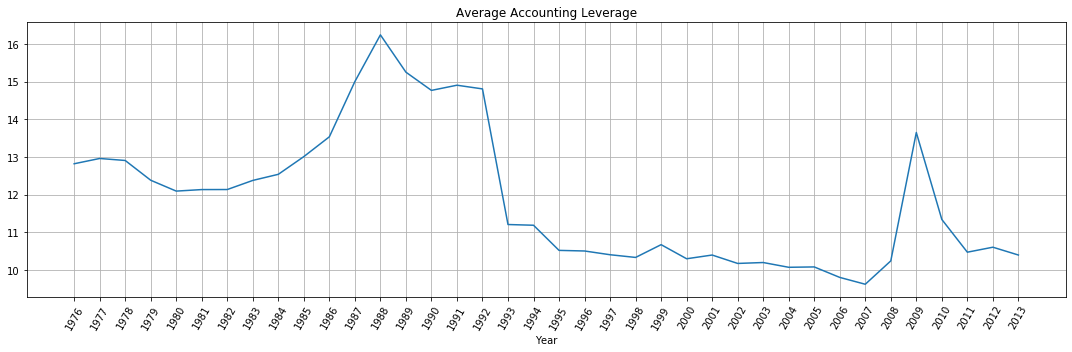

In [11]:
df_years_mean = pd.DataFrame()

df_years_mean = df.groupby(["year"]).agg({"leverageRatio":"mean"})
#print(df)
df_years_mean.index = df_years_mean.index.astype(int)
fig, ax = plt.subplots(figsize=(15,5));
ax.set_xticks(df_years_mean.index)
ax.set_xticklabels(df_years_mean.index, rotation=60)
ax.set_xlabel("Year")
ax.set_title("Average Accounting Leverage")
ax.grid()
ax.plot(df_years_mean.leverageRatio)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/LeverageDistribution_LeverageRatio_7613.png')

Mean of top 10 banks vs mean of rest

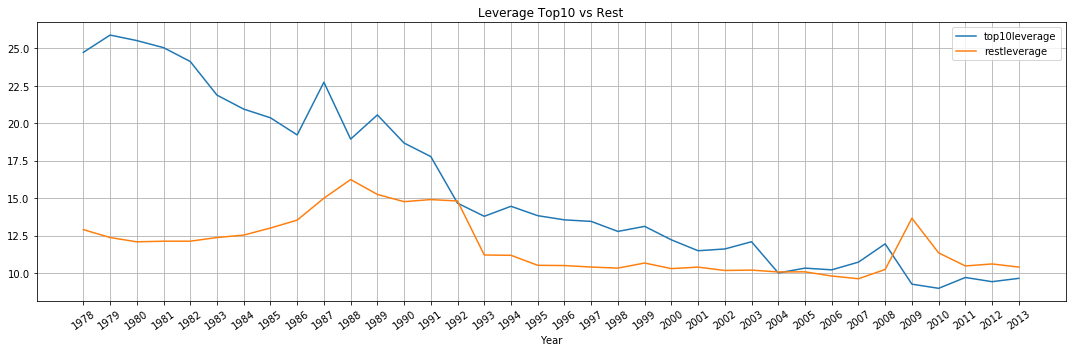

In [12]:

year = 1978
top10_array = []
rest_array = []
df = df_all.reset_index(level="year")
df_Top10AssetsPerYear = pd.DataFrame()
df_RestAssetsPerYear = pd.DataFrame()

df.drop(df[df.equity<=0].index, inplace=True) #drop rows with equity<0

for i in range(36):
    #Top10 berechnen
    temp_df = df[df.year==year]
    temp_df.sort_values("assets", ascending=False, inplace=True)
    df_top10 = temp_df.head(10)
    df_Top10AssetsPerYear = df_Top10AssetsPerYear.append(df_top10)
    df_top10_mean = df_top10.leverageRatio.mean()
    top10_array.append(df_top10_mean)
    
    #Rest berechnen
    df_rest = temp_df.iloc[10:,:]
    df_rest_mean = df_rest.leverageRatio.mean()
    rest_array.append(df_rest_mean)
    df_RestAssetsPerYear = df_RestAssetsPerYear.append(df_rest)
    year = year + 1

#print(top10_array)
#print(rest_array)

dic_final = { "top10leverage" : top10_array,
            "restleverage" : rest_array }
years = [str(year) for year in range(1978, 2014)]
df_final = pd.DataFrame(dic_final, index=years)

#print(df_final)


fig, ax = plt.subplots(figsize=(15,5));
#ax.set_xticks(df_years_mean.index)
ax.set_xticklabels(df_final.index, rotation=35)
ax.plot(df_final)
ax.legend(["top10leverage", "restleverage"])
ax.set_xlabel("Year")
ax.set_title("Leverage Top10 vs Rest")
ax.grid()
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/Leverage/LeverageDistribution_LeverageRatioTop10vsRest_7813.png')

Leverage analysis - years 2000-2013

In [13]:
year = 1978
top10_array = []
rest_array = []
df = df_all.reset_index(level="year")
df

,year,assets,equity,leverageRatio
rssdid,,,,
128146.0,1976.0,11559.0,1049.0,11.019066
128146.0,1977.0,14624.0,1177.0,12.424809
128146.0,1978.0,15926.0,1255.0,12.690040
128146.0,1979.0,17770.0,1341.0,13.251305
128146.0,1980.0,18864.0,1413.0,13.350318
...,...,...,...,...
4262543.0,2011.0,854235.0,172534.0,4.951111
4262543.0,2012.0,777842.0,173092.0,4.493807
4262543.0,2013.0,808999.0,168617.0,4.797850


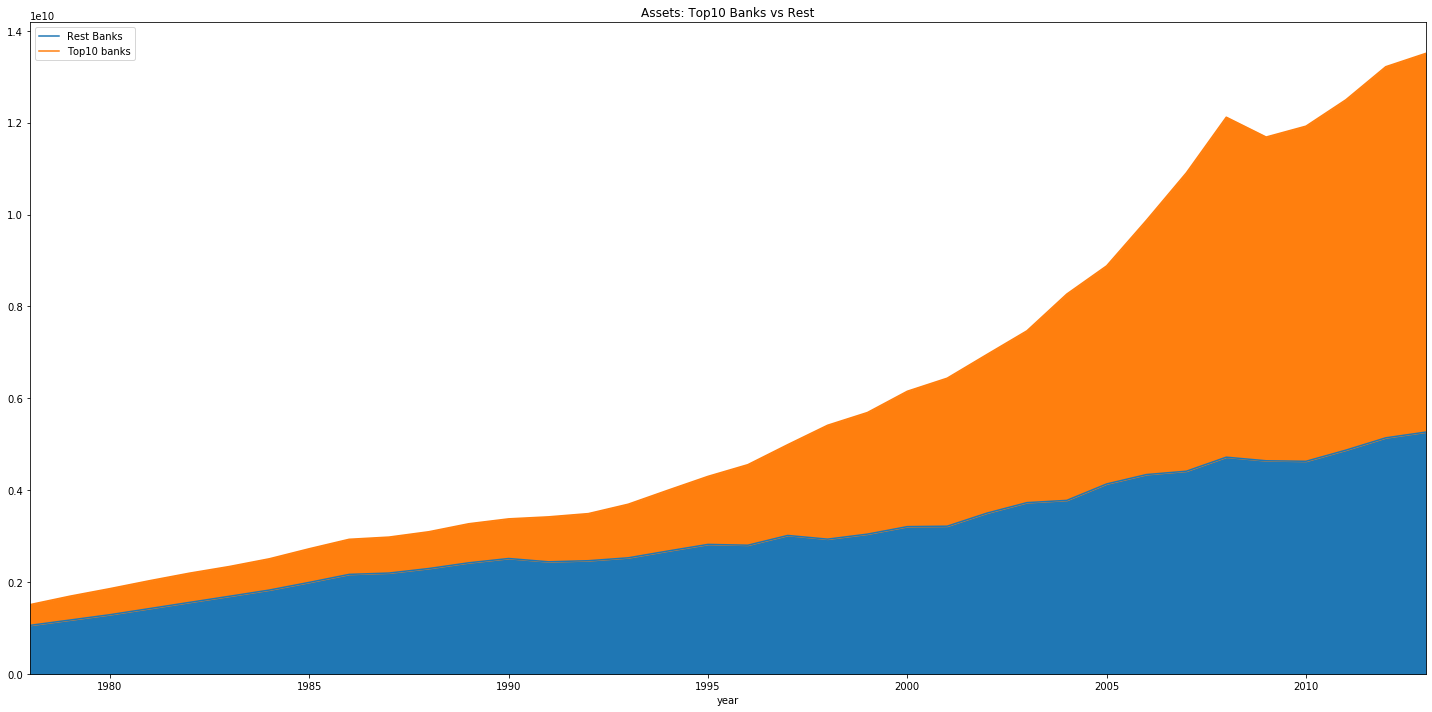

In [14]:
df_Top10AssetsAgg = df_Top10AssetsPerYear.groupby("year").sum()
df_RestAssetsPerYearAgg = df_RestAssetsPerYear.groupby("year").sum()

df_Top10AssetsAgg["restAssets"] = df_RestAssetsPerYearAgg.assets

fig, ax = plt.subplots(figsize=(20,10))
df_Top10AssetsAgg.plot.area(ax=ax, y=["restAssets", "assets"] )
ax.set_title("Assets: Top10 Banks vs Rest")
ax.legend(["Rest Banks", "Top10 banks"])
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/LeverageDistribution_AssetsTop10vsRest_7813.png')


In [15]:
df_Top10vsRest = df_Top10AssetsAgg.copy()
import matplotlib.ticker as mtick

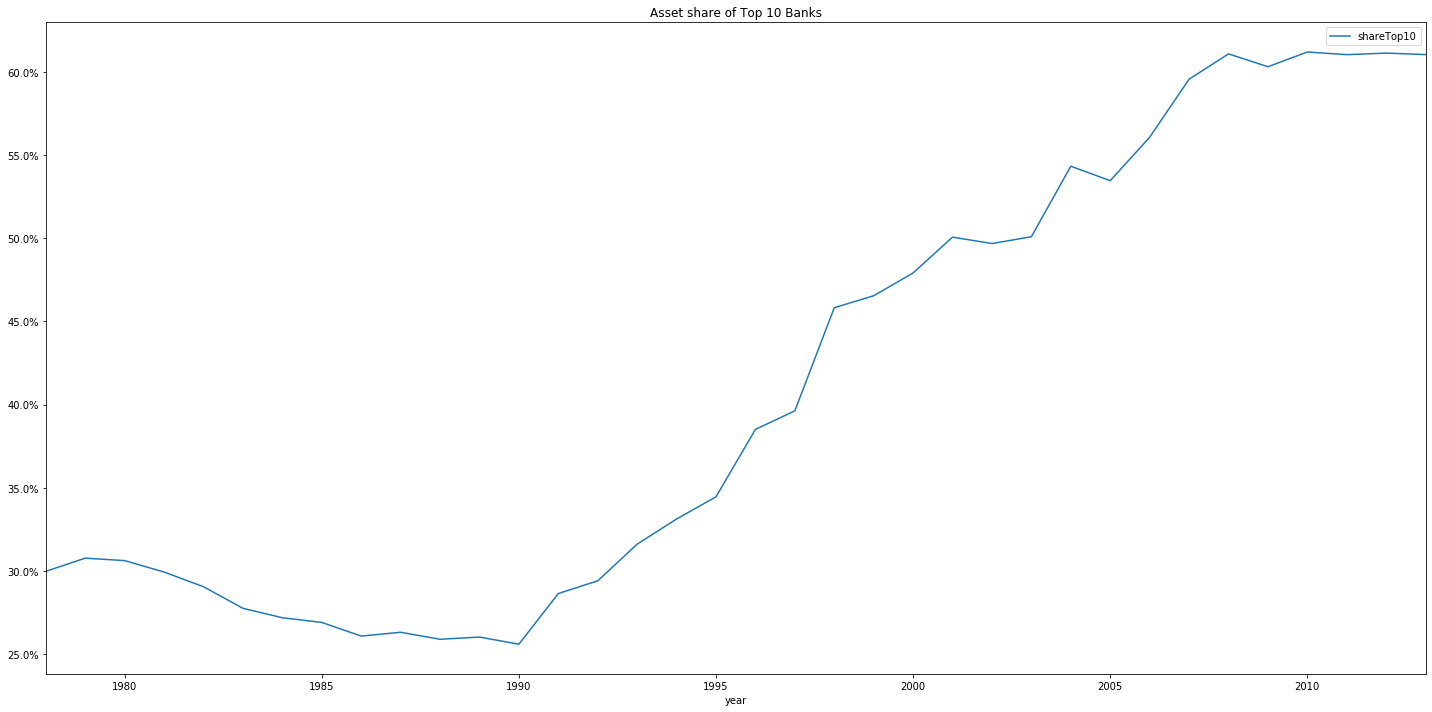

In [16]:
df_Top10vsRest["allAssets"] = df_Top10vsRest.assets + df_Top10vsRest.restAssets

df_Top10vsRest["shareTop10"] = df_Top10vsRest.assets/df_Top10vsRest.allAssets
df_Top10vsRestPerc = df_Top10vsRest.copy()
df_Top10vsRestPerc.shareTop10 = df_Top10vsRest.shareTop10*100
fig, ax = plt.subplots(figsize=(20,10))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title("Asset share of Top 10 Banks")
df_Top10vsRestPerc.plot(ax=ax, y=["shareTop10"])
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/LeverageDistribution_shareTop10_7813.png')